In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
train_data[0]
train_labels[0]
max([max(sequence) for sequence in train_data])

9999

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[0]
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [5]:
#Model definition

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5, noise_shape=None, seed=None),
   #layers.Dense(16, activation="relu"),
  #layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [6]:
#Compiling the model


model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Validating your approach


Setting aside a validation set

---



In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training your model



In [8]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 4s 90ms/step - loss: 0.5165 - accuracy: 0.7573 - val_loss: 0.3889 - val_accuracy: 0.8471
Epoch 2/20
30/30 [==============================] - 3s 107ms/step - loss: 0.3274 - accuracy: 0.8759 - val_loss: 0.3174 - val_accuracy: 0.8751
Epoch 3/20
30/30 [==============================] - 2s 67ms/step - loss: 0.2659 - accuracy: 0.9030 - val_loss: 0.2821 - val_accuracy: 0.8914
Epoch 4/20
30/30 [==============================] - 2s 62ms/step - loss: 0.2244 - accuracy: 0.9192 - val_loss: 0.2894 - val_accuracy: 0.8812
Epoch 5/20
30/30 [==============================] - 2s 65ms/step - loss: 0.1976 - accuracy: 0.9313 - val_loss: 0.2723 - val_accuracy: 0.8887
Epoch 6/20
30/30 [==============================] - 2s 70ms/step - loss: 0.1740 - accuracy: 0.9399 - val_loss: 0.2739 - val_accuracy: 0.8875
Epoch 7/20
30/30 [==============================] - 2s 70ms/step - loss: 0.1558 - accuracy: 0.9461 - val_loss: 0.2801 - val_accuracy: 0.8856
Epoch 8/20
3

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting the training and validation loss



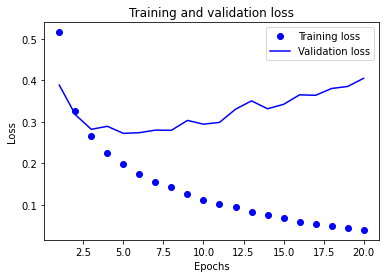

In [9]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

We can clearly seethat there is divergence in the training and validation set.
The loss keep on inceasing when validation set is introduced. This is a clear indication that the model has overfit the training set.

Plotting the training and validation accuracy



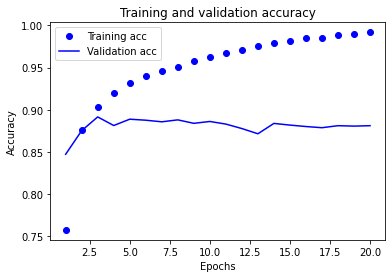

In [10]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

This further confirms that the model overfits the training dataset. The Accuracy of training dataset is close to one and the acuracy of validation set is close to 87%. The best way to address is to perform regularization.

#Retraining a model from scratch



In [11]:
model = keras.Sequential([
    layers.Dense(64, activation="tanh"),
  # layers.Dense(16, activation="relu"),
  # layers.Dense(8, activation="relu"),
    layers.Dropout(0.5, noise_shape=None, seed=None),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 4s 67ms/step - loss: 0.4371 - accuracy: 0.8215
Epoch 2/4
49/49 [==============================] - 2s 50ms/step - loss: 0.2708 - accuracy: 0.8996
Epoch 3/4
49/49 [==============================] - 2s 50ms/step - loss: 0.2278 - accuracy: 0.9125
Epoch 4/4
782/782 [==============================] - 4s 4ms/step - loss: 0.2791 - accuracy: 0.8874


In [12]:
#results = model.evaluate(x_test, y_test)
results

[0.279133677482605, 0.887440025806427]


**Using a trained model to generate predictions on new data**

In [38]:
model.predict(x_test)


782/782 [==============================] - 2s 2ms/step


array([[0.22106166],
       [0.9995924 ],
       [0.7526424 ],
       ...,
       [0.08923885],
       [0.09691383],
       [0.53091305]], dtype=float32)

In [16]:
str(history)

'<keras.callbacks.History object at 0x7fb6890633d0>'